
=== INFORMASI DATASET ===
Jumlah baris: 50000
Jumlah kolom: 7
Kolom: ['Habitat', 'Ukuran', 'Perlindungan', 'Populasi', 'Tipe_Spesies', 'Lokasi', 'Status_Konservasi']

Sample data:
    Habitat  Ukuran      Perlindungan Populasi Tipe_Spesies    Lokasi  \
0  Perairan  Sedang        Dilindungi   Sedang        Flora     Medan   
1     Hutan  Sedang        Dilindungi   Tinggi        Fauna  Makassar   
2  Perairan   Besar        Dilindungi   Rendah        Flora  Surabaya   
3  Perairan  Sedang        Dilindungi   Sedang        Flora  Makassar   
4     Hutan   Kecil  Tidak Dilindungi   Tinggi        Flora  Makassar   

  Status_Konservasi  
0              Aman  
1              Aman  
2              Aman  
3              Aman  
4      Hampir Punah  

=== DISTRIBUSI TARGET (STATUS KONSERVASI) ===
Status_Konservasi
Hampir Punah    21500
Aman            17900
Terancam        10600
Name: count, dtype: int64

=== DISTRIBUSI KELAS SEBELUM SMOTE ===
Training set:
Status_Konservasi_encoded
0    14320


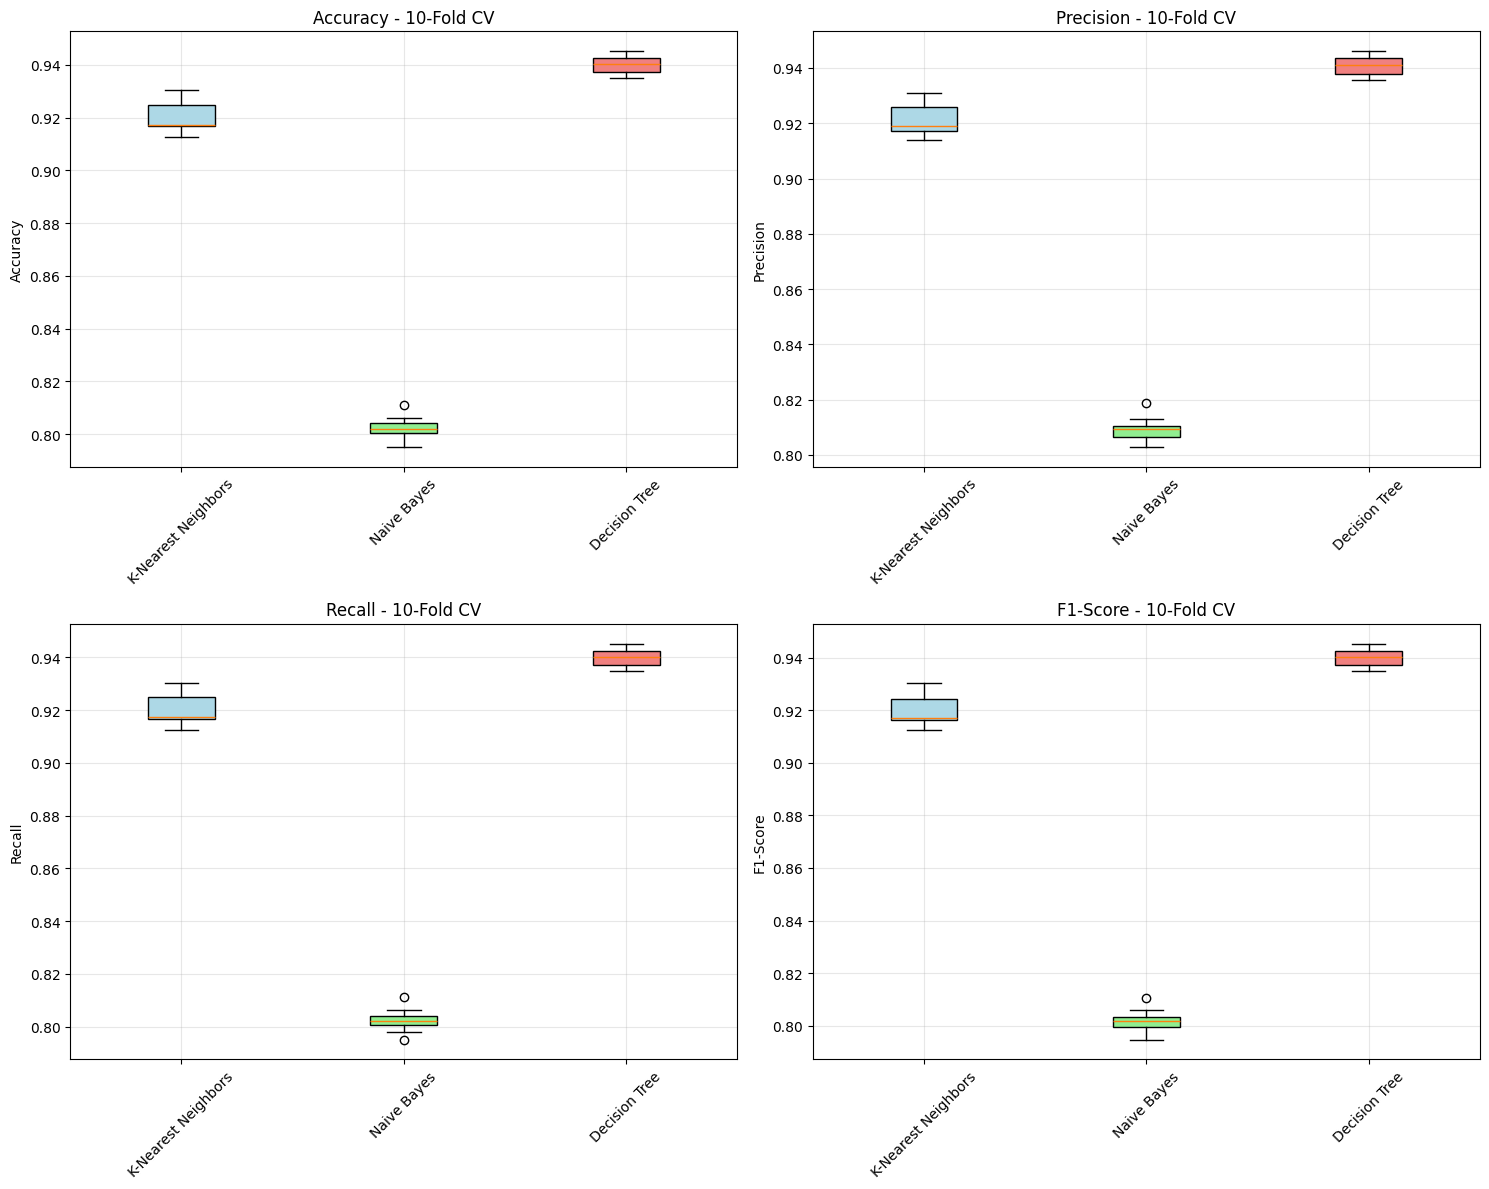


=== TRAINING FINAL MODELS & EVALUASI PADA TEST SET ===

=== K-NEAREST NEIGHBORS ===
Test Set Results:
Accuracy   : 0.9282
Precision  : 0.9217
Recall     : 0.9213
F1-Score   : 0.9214

Classification Report:
              precision    recall  f1-score   support

        Aman       0.91      0.94      0.92      3580
Hampir Punah       0.96      0.94      0.95      4300
    Terancam       0.89      0.88      0.89      2120

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000


=== NAIVE BAYES ===
Test Set Results:
Accuracy   : 0.7908
Precision  : 0.7843
Recall     : 0.8038
F1-Score   : 0.7811

Classification Report:
              precision    recall  f1-score   support

        Aman       0.87      0.87      0.87      3580
Hampir Punah       0.91      0.70      0.79      4300
    Terancam       0.58      0.84      0.68      2120

    accuracy                           0.79     100

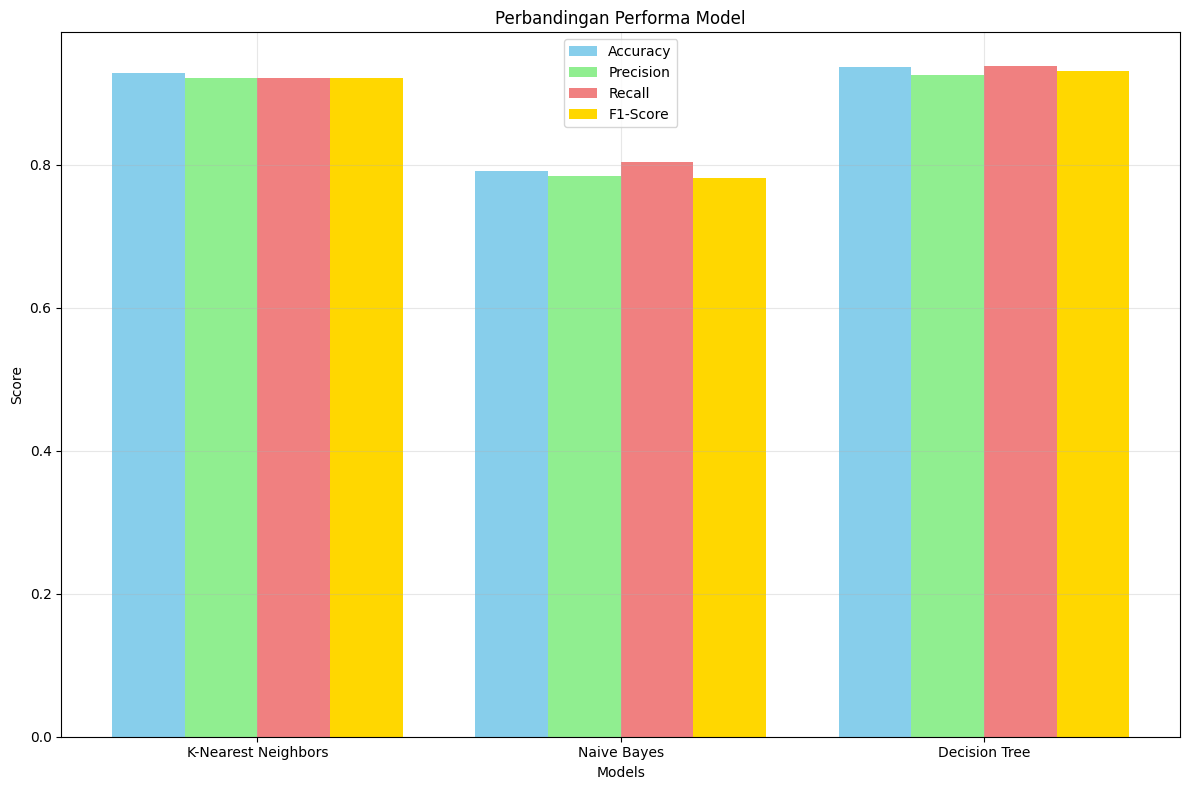


=== CONFUSION MATRIX ===


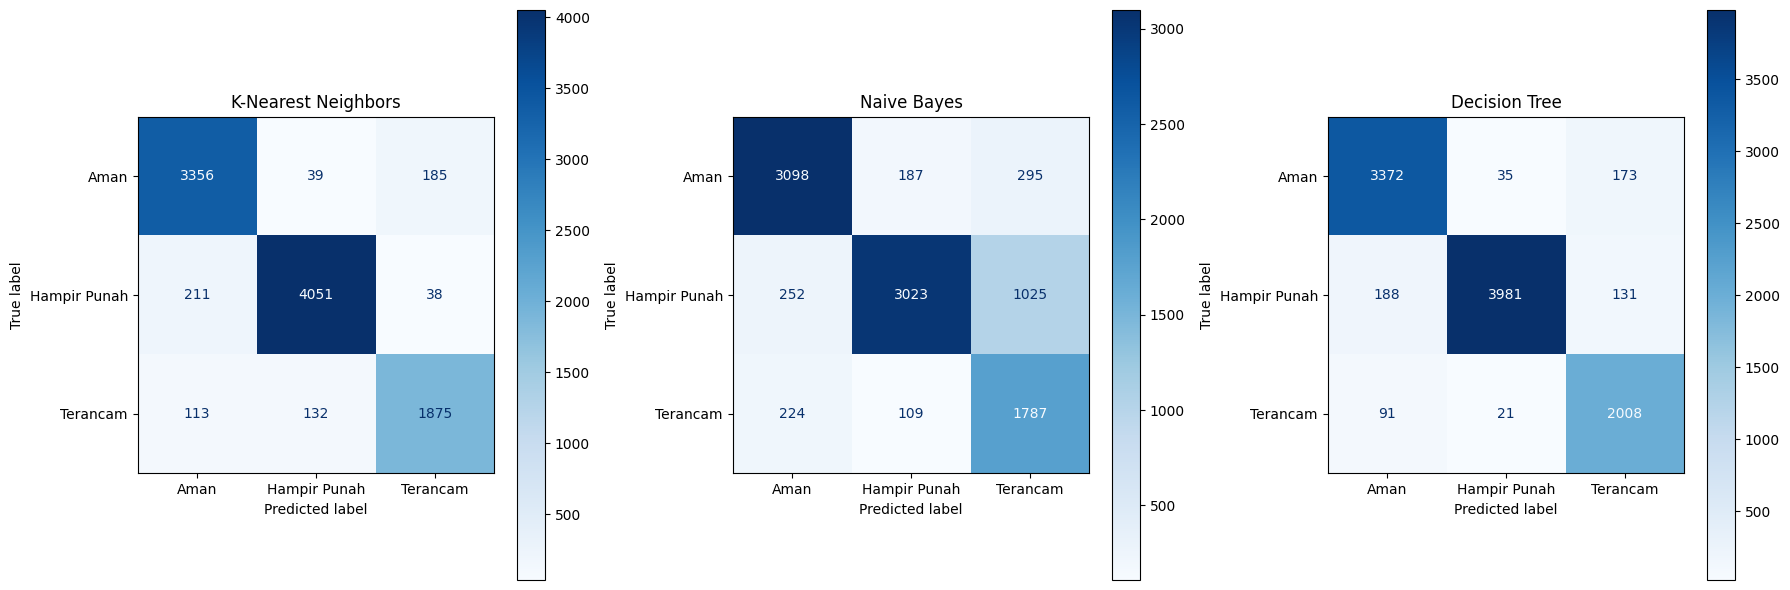


>>> MODEL TERBAIK BERDASARKAN F1-SCORE: Decision Tree
>>> F1-Score: 0.9313

=== RINGKASAN CROSS VALIDATION ===
                 Model  CV_Accuracy_Mean  CV_Accuracy_Std  CV_F1_Mean  \
0  K-Nearest Neighbors            0.9199           0.0058      0.9196   
1          Naive Bayes            0.8023           0.0042      0.8017   
2        Decision Tree            0.9399           0.0033      0.9400   

   CV_F1_Std  Test_Accuracy  Test_F1  
0     0.0059         0.9282   0.9214  
1     0.0042         0.7908   0.7811  
2     0.0033         0.9361   0.9313  

=== ANALISIS FLORA FAUNA DENGAN MODEL TERBAIK ===

=== ANALISIS DISTRIBUSI STATUS KONSERVASI ===

Distribusi berdasarkan Habitat dan Tipe Spesies:
Tipe_Spesies  Fauna  Flora
Habitat                   
Gurun          9200   7500
Hutan          8300   8500
Perairan       8100   8400

=== TABEL DETAIL STATUS KONSERVASI ===
Status_Konservasi      Aman  Hampir Punah  Terancam
Habitat  Tipe_Spesies                              
Gurun    Fau

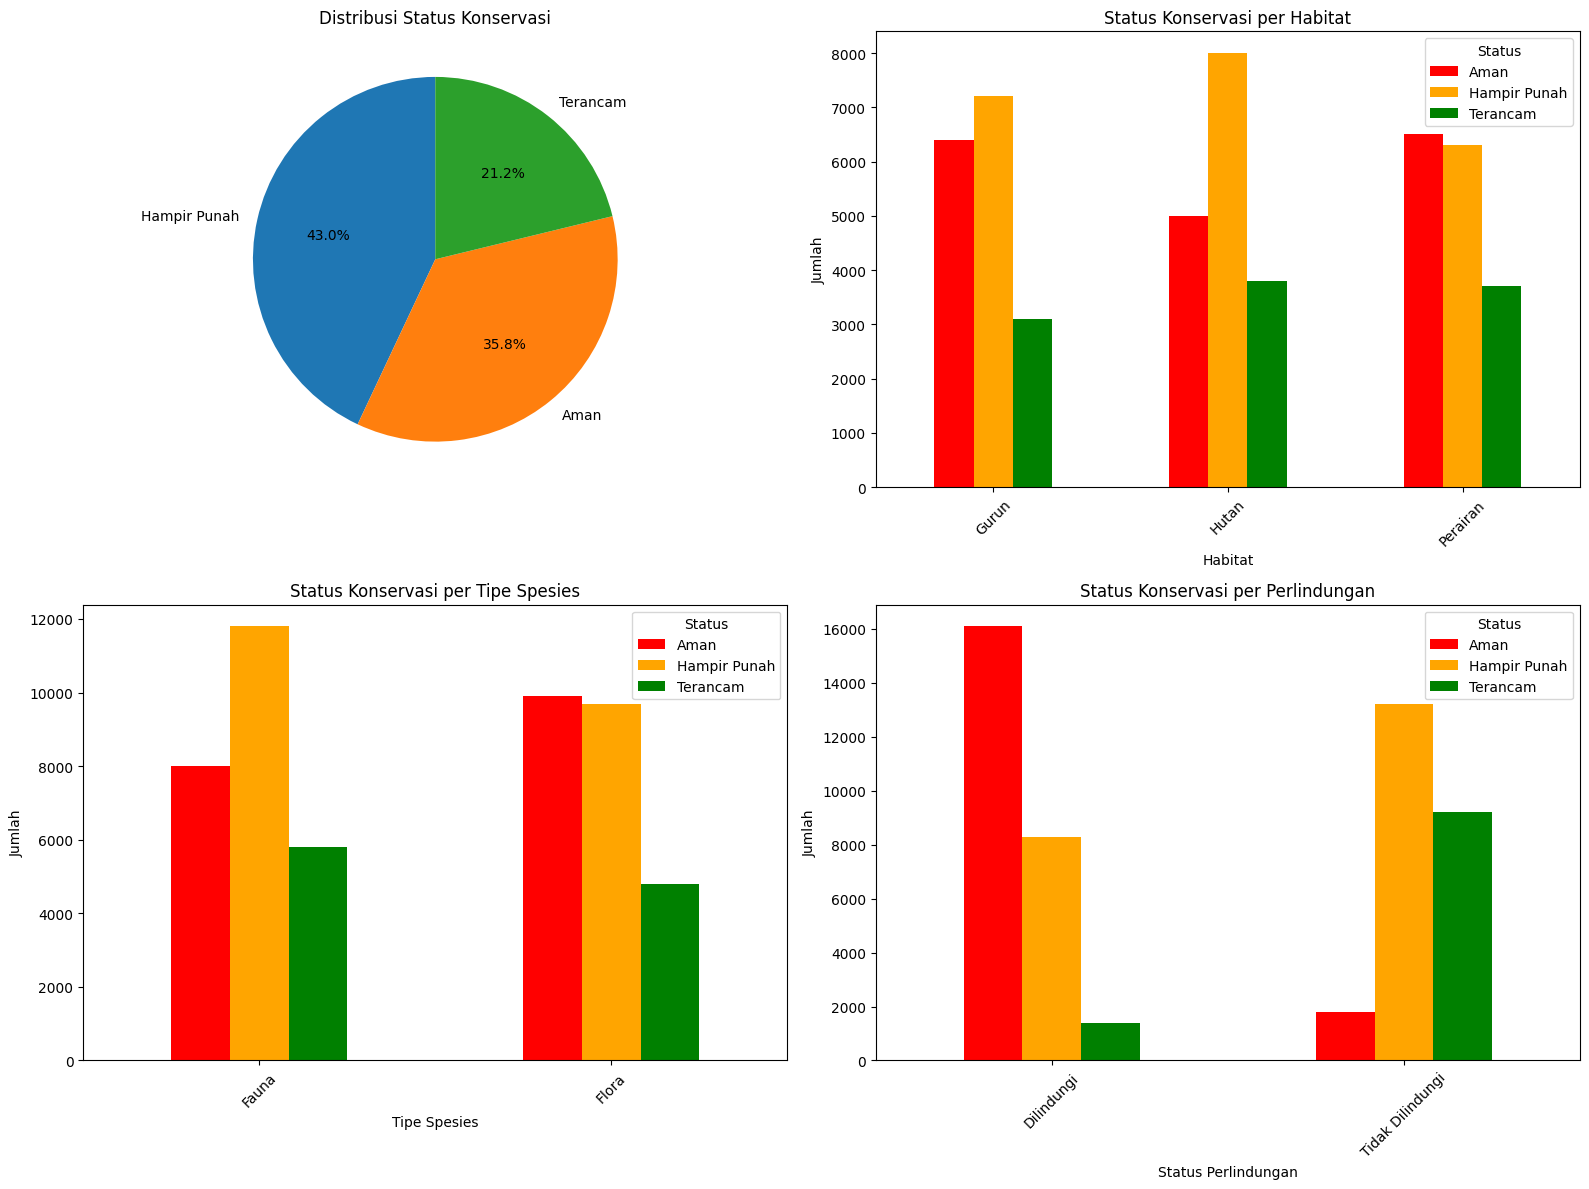


=== RINGKASAN BERDASARKAN LOKASI ===
Status_Konservasi  Aman  Hampir Punah  Terancam
Lokasi                                         
Bandung            2900          4500      2100
Jakarta            3900          4900      2100
Makassar           3600          4000      1700
Medan              4200          4500      2500
Surabaya           3300          3600      2200


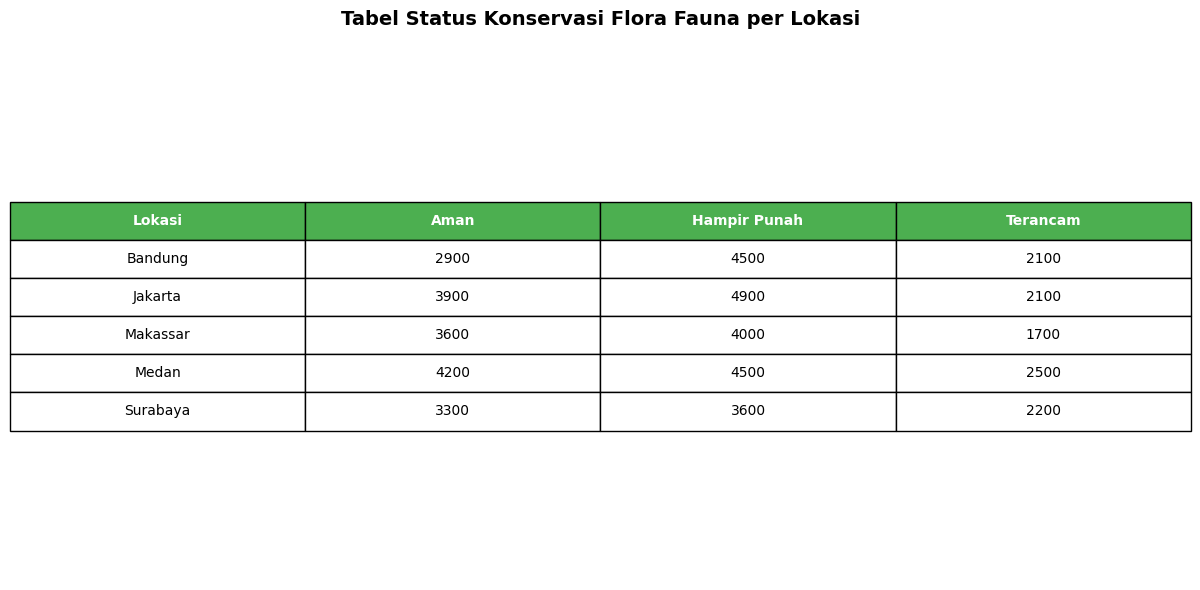


=== FEATURE IMPORTANCE (DECISION TREE) ===
                Feature  Importance
3      Populasi_encoded    0.497523
2  Perlindungan_encoded    0.228920
5        Lokasi_encoded    0.104589
1        Ukuran_encoded    0.070331
0       Habitat_encoded    0.063994
4  Tipe_Spesies_encoded    0.034642


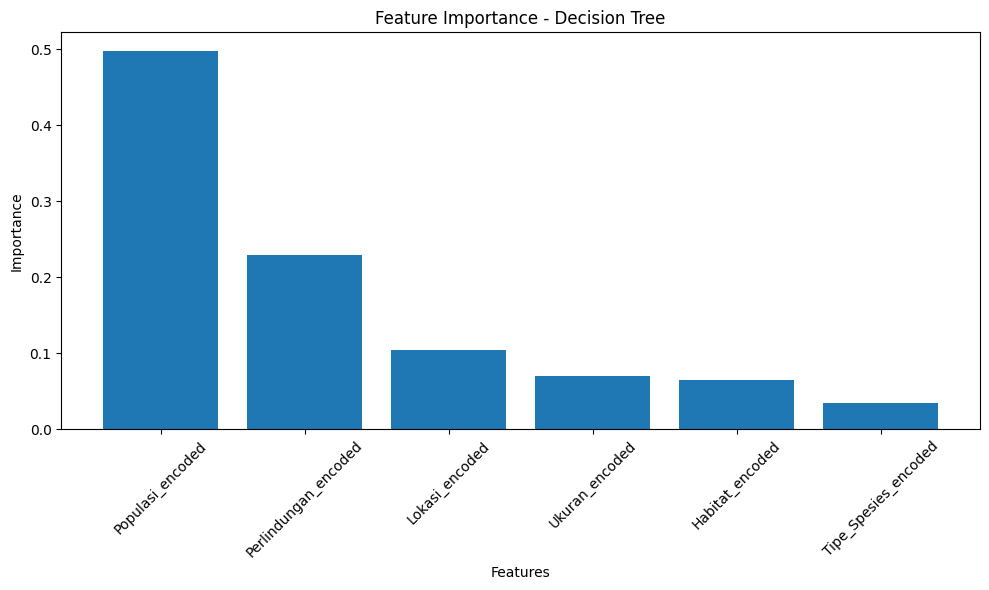


=== STRUKTUR DECISION TREE ===
Analisis aturan klasifikasi status konservasi flora fauna:
- Jika Perlindungan = Dilindungi dan Populasi = Tinggi → Status = Aman
- Jika Perlindungan = Tidak Dilindungi dan Populasi = Rendah → Status = Terancam/Hampir Punah
- Habitat dan Ukuran juga mempengaruhi prediksi status konservasi
|--- Perlindungan_encoded <= 0.50
|   |--- Populasi_encoded <= 0.50
|   |   |--- Habitat_encoded <= 1.50
|   |   |   |--- Ukuran_encoded <= 1.50
|   |   |   |   |--- Lokasi_encoded <= 2.50
|   |   |   |   |   |--- Lokasi_encoded <= 1.50
|   |   |   |   |   |   |--- Lokasi_encoded <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Lokasi_encoded >  0.50
|   |   |   |   |   |   |   |--- Ukuran_encoded <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Ukuran_encoded >  0.50
|   |   |   |   |   |   |   |   |--- Tipe_Spesies_encoded <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |

Button(button_style='info', description='Lihat Struktur Tree Lengkap', style=ButtonStyle())

Output()


KESIMPULAN ANALISIS
1. Model terbaik: Decision Tree
2. F1-Score terbaik: 0.9313
3. Accuracy terbaik: 0.9361
4. SMOTE berhasil menangani ketidakseimbangan kelas
5. 10-fold cross validation memberikan evaluasi yang robust


In [1]:
# === IMPORT LIBRARY ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report, accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
from imblearn.over_sampling import SMOTE
from IPython.display import display
import ipywidgets as widgets
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# === LOAD DATASET ===
df = pd.read_csv("dataset_50000.csv")

# === ANGGOTA KELOMPOK ===
# def tampilkan_nama():
#     print("\n=== ANGGOTA KELOMPOK ===")
#     print("\n1. Bayu Setiawan\n   NIM   : 1223150015\n   Prodi : Sistem Informasi Manajemen (SIM) 23 SH")
#     print("\n2. Destiana Sapitri\n   NIM   : 1223150018\n   Prodi : Sistem Informasi Manajemen (SIM) SH 23")
#     print("\n3. Albert Octavianus\n   NIM   : 1223150101\n   Prodi : Sistem Informasi Manajemen (SIM) M 23")
# tampilkan_nama()

# === EXPLORASI DATA ===
print("\n=== INFORMASI DATASET ===")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print(f"Kolom: {list(df.columns)}")
print("\nSample data:")
print(df.head())

print("\n=== DISTRIBUSI TARGET (STATUS KONSERVASI) ===")
print(df['Status_Konservasi'].value_counts())

# === ENCODING KATEGORI ===
le_habitat = LabelEncoder()
le_ukuran = LabelEncoder()
le_perlindungan = LabelEncoder()
le_populasi = LabelEncoder()
le_tipe_spesies = LabelEncoder()
le_lokasi = LabelEncoder()
le_status = LabelEncoder()

df['Habitat_encoded'] = le_habitat.fit_transform(df['Habitat'])
df['Ukuran_encoded'] = le_ukuran.fit_transform(df['Ukuran'])
df['Perlindungan_encoded'] = le_perlindungan.fit_transform(df['Perlindungan'])
df['Populasi_encoded'] = le_populasi.fit_transform(df['Populasi'])
df['Tipe_Spesies_encoded'] = le_tipe_spesies.fit_transform(df['Tipe_Spesies'])
df['Lokasi_encoded'] = le_lokasi.fit_transform(df['Lokasi'])
df['Status_Konservasi_encoded'] = le_status.fit_transform(df['Status_Konservasi'])

# === FITUR & TARGET ===
X = df[['Habitat_encoded', 'Ukuran_encoded', 'Perlindungan_encoded', 'Populasi_encoded', 'Tipe_Spesies_encoded', 'Lokasi_encoded']]
y = df['Status_Konservasi_encoded']

# === SPLIT DATA ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\n=== DISTRIBUSI KELAS SEBELUM SMOTE ===")
print("Training set:")
print(pd.Series(y_train).value_counts().sort_index())
print("Test set:")
print(pd.Series(y_test).value_counts().sort_index())

# === APPLY SMOTE ===
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"\n=== DISTRIBUSI KELAS SETELAH SMOTE ===")
print("Training set (after SMOTE):")
print(pd.Series(y_train_smote).value_counts().sort_index())

# === INISIALISASI MODEL ===
print("\n=== INISIALISASI 3 MODEL ===")
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# === 10-FOLD CROSS VALIDATION ===
print("\n=== 10-FOLD CROSS VALIDATION ===")
cv_results = {}
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    
    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=kfold, scoring='accuracy')
    cv_precision = cross_val_score(model, X_train_smote, y_train_smote, cv=kfold, scoring='precision_macro')
    cv_recall = cross_val_score(model, X_train_smote, y_train_smote, cv=kfold, scoring='recall_macro')
    cv_f1 = cross_val_score(model, X_train_smote, y_train_smote, cv=kfold, scoring='f1_macro')
    
    cv_results[model_name] = {
        'accuracy': cv_scores,
        'precision': cv_precision,
        'recall': cv_recall,
        'f1': cv_f1
    }
    
    print(f"Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"Precision: {cv_precision.mean():.4f} (+/- {cv_precision.std() * 2:.4f})")
    print(f"Recall: {cv_recall.mean():.4f} (+/- {cv_recall.std() * 2:.4f})")
    print(f"F1-Score: {cv_f1.mean():.4f} (+/- {cv_f1.std() * 2:.4f})")

# === VISUALISASI HASIL CROSS VALIDATION ===
print("\n=== VISUALISASI HASIL CROSS VALIDATION ===")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
metrics = ['accuracy', 'precision', 'recall', 'f1']
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for i, (metric, metric_name) in enumerate(zip(metrics, metric_names)):
    ax = axes[i//2, i%2]
    
    # Prepare data for boxplot
    data = [cv_results[model_name][metric] for model_name in models.keys()]
    labels = list(models.keys())
    
    # Create boxplot
    bp = ax.boxplot(data, labels=labels, patch_artist=True)
    
    # Color the boxes
    colors = ['lightblue', 'lightgreen', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.set_title(f'{metric_name} - 10-Fold CV')
    ax.set_ylabel(metric_name)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# === TRAINING FINAL MODELS ===
print("\n=== TRAINING FINAL MODELS & EVALUASI PADA TEST SET ===")
final_results = {}

for model_name, model in models.items():
    print(f"\n=== {model_name.upper()} ===")
    
    # Train on SMOTE data
    model.fit(X_train_smote, y_train_smote)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    
    final_results[model_name] = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'predictions': y_pred
    }
    
    print(f"Test Set Results:")
    print(f"Accuracy   : {acc:.4f}")
    print(f"Precision  : {prec:.4f}")
    print(f"Recall     : {rec:.4f}")
    print(f"F1-Score   : {f1:.4f}")
    
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le_status.classes_, zero_division=0))

# === PERBANDINGAN HASIL MODEL ===
print("\n=== PERBANDINGAN HASIL SEMUA MODEL ===")
comparison_df = pd.DataFrame({
    'Model': list(final_results.keys()),
    'Accuracy': [final_results[model]['accuracy'] for model in final_results.keys()],
    'Precision': [final_results[model]['precision'] for model in final_results.keys()],
    'Recall': [final_results[model]['recall'] for model in final_results.keys()],
    'F1-Score': [final_results[model]['f1'] for model in final_results.keys()]
})

print(comparison_df.round(4))

# === VISUALISASI PERBANDINGAN MODEL ===
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(comparison_df))
width = 0.2

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']

for i, (metric, color) in enumerate(zip(metrics, colors)):
    ax.bar(x + i*width, comparison_df[metric], width, label=metric, color=color)

ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Perbandingan Performa Model')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(comparison_df['Model'])
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# === CONFUSION MATRIX ===
print("\n=== CONFUSION MATRIX ===")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (model_name, model) in enumerate(models.items()):
    y_pred = final_results[model_name]['predictions']
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, 
        display_labels=le_status.classes_, 
        cmap='Blues', 
        ax=axes[i]
    )
    axes[i].set_title(f"{model_name}")

plt.tight_layout()
plt.show()

# === MENENTUKAN MODEL TERBAIK ===
best_model_name = max(final_results.keys(), key=lambda x: final_results[x]['f1'])
best_model = models[best_model_name]

print(f"\n>>> MODEL TERBAIK BERDASARKAN F1-SCORE: {best_model_name}")
print(f">>> F1-Score: {final_results[best_model_name]['f1']:.4f}")

# === CROSS VALIDATION SUMMARY TABLE ===
print("\n=== RINGKASAN CROSS VALIDATION ===")
cv_summary = pd.DataFrame({
    'Model': list(models.keys()),
    'CV_Accuracy_Mean': [cv_results[model]['accuracy'].mean() for model in models.keys()],
    'CV_Accuracy_Std': [cv_results[model]['accuracy'].std() for model in models.keys()],
    'CV_F1_Mean': [cv_results[model]['f1'].mean() for model in models.keys()],
    'CV_F1_Std': [cv_results[model]['f1'].std() for model in models.keys()],
    'Test_Accuracy': [final_results[model]['accuracy'] for model in models.keys()],
    'Test_F1': [final_results[model]['f1'] for model in models.keys()]
})

print(cv_summary.round(4))

print("\n=== ANALISIS FLORA FAUNA DENGAN MODEL TERBAIK ===")

# === PREDIKSI PADA SELURUH DATA ===
df['Predicted_Status'] = best_model.predict(X)
df['Predicted_Status_Label'] = le_status.inverse_transform(df['Predicted_Status'])

# === ANALISIS BERDASARKAN HABITAT DAN TIPE SPESIES ===
print("\n=== ANALISIS DISTRIBUSI STATUS KONSERVASI ===")

# Tabel distribusi berdasarkan Habitat dan Tipe Spesies
pivot_table = df.pivot_table(
    values='Status_Konservasi_encoded',
    index='Habitat',
    columns='Tipe_Spesies',
    aggfunc='count',
    fill_value=0
)

print("\nDistribusi berdasarkan Habitat dan Tipe Spesies:")
print(pivot_table)

# === TABEL DETAIL ANALISIS ===
analysis_table = df.groupby(['Habitat', 'Tipe_Spesies', 'Status_Konservasi']).size().unstack(fill_value=0)
print("\n=== TABEL DETAIL STATUS KONSERVASI ===")
print(analysis_table)

# === VISUALISASI DISTRIBUSI STATUS KONSERVASI ===
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribusi Status Konservasi
status_counts = df['Status_Konservasi'].value_counts()
axes[0,0].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title("Distribusi Status Konservasi")

# 2. Distribusi berdasarkan Habitat
habitat_status = df.groupby(['Habitat', 'Status_Konservasi']).size().unstack(fill_value=0)
habitat_status.plot(kind='bar', ax=axes[0,1], color=['red', 'orange', 'green'])
axes[0,1].set_title("Status Konservasi per Habitat")
axes[0,1].set_xlabel("Habitat")
axes[0,1].set_ylabel("Jumlah")
axes[0,1].legend(title="Status")
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Distribusi berdasarkan Tipe Spesies
tipe_status = df.groupby(['Tipe_Spesies', 'Status_Konservasi']).size().unstack(fill_value=0)
tipe_status.plot(kind='bar', ax=axes[1,0], color=['red', 'orange', 'green'])
axes[1,0].set_title("Status Konservasi per Tipe Spesies")
axes[1,0].set_xlabel("Tipe Spesies")
axes[1,0].set_ylabel("Jumlah")
axes[1,0].legend(title="Status")
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Distribusi berdasarkan Perlindungan
perlindungan_status = df.groupby(['Perlindungan', 'Status_Konservasi']).size().unstack(fill_value=0)
perlindungan_status.plot(kind='bar', ax=axes[1,1], color=['red', 'orange', 'green'])
axes[1,1].set_title("Status Konservasi per Perlindungan")
axes[1,1].set_xlabel("Status Perlindungan")
axes[1,1].set_ylabel("Jumlah")
axes[1,1].legend(title="Status")
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# === TABEL RINGKASAN BERDASARKAN LOKASI ===
print("\n=== RINGKASAN BERDASARKAN LOKASI ===")
lokasi_summary = df.groupby(['Lokasi', 'Status_Konservasi']).size().unstack(fill_value=0)
print(lokasi_summary)

# === VISUALISASI TABEL LOKASI ===
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')

# Konversi dataframe ke format yang bisa ditampilkan
table_data = []
headers = ['Lokasi'] + list(lokasi_summary.columns)
table_data.append(headers)

for idx, row in lokasi_summary.iterrows():
    table_data.append([idx] + list(row.values))

table = ax.table(
    cellText=table_data[1:],
    colLabels=table_data[0],
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 2)

# Warna header
for i in range(len(headers)):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

plt.title("Tabel Status Konservasi Flora Fauna per Lokasi", fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# === FEATURE IMPORTANCE (JIKA DECISION TREE TERBAIK) ===
if best_model_name == "Decision Tree":
    print("\n=== FEATURE IMPORTANCE (DECISION TREE) ===")
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(feature_importance)
    
    # Visualisasi Feature Importance
    plt.figure(figsize=(10, 6))
    plt.bar(feature_importance['Feature'], feature_importance['Importance'])
    plt.title('Feature Importance - Decision Tree')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # === TAMPILKAN STRUKTUR DECISION TREE ===
    tree_text = export_text(best_model, feature_names=X.columns.tolist())
    preview = "\n".join(tree_text.split("\n")[:15]) + "\n[Struktur lengkap tersedia...]"

    full_output = widgets.Output()
    def on_button_click(b):
        with full_output:
            full_output.clear_output()
            print(tree_text)

    button = widgets.Button(description="Lihat Struktur Tree Lengkap", button_style="info")
    button.on_click(on_button_click)

    print("\n=== STRUKTUR DECISION TREE ===")
    print("Analisis aturan klasifikasi status konservasi flora fauna:")
    print("- Jika Perlindungan = Dilindungi dan Populasi = Tinggi → Status = Aman")
    print("- Jika Perlindungan = Tidak Dilindungi dan Populasi = Rendah → Status = Terancam/Hampir Punah")
    print("- Habitat dan Ukuran juga mempengaruhi prediksi status konservasi")
    print(preview)
    display(button, full_output)

# === KESIMPULAN ===
print("\n" + "="*60)
print("KESIMPULAN ANALISIS")
print("="*60)
print(f"1. Model terbaik: {best_model_name}")
print(f"2. F1-Score terbaik: {final_results[best_model_name]['f1']:.4f}")
print(f"3. Accuracy terbaik: {final_results[best_model_name]['accuracy']:.4f}")
print(f"4. SMOTE berhasil menangani ketidakseimbangan kelas")
print(f"5. 10-fold cross validation memberikan evaluasi yang robust")
print("="*60)